In [460]:
import xmlrpc.client

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import src.util as util

x_train, y_train = util.load_dataset('data/ds1_train.csv', add_intercept=True)
x_valid, y_valid = util.load_dataset('data/ds1_valid.csv', add_intercept=True)
x_train.shape, y_train.shape

((800, 3), (800,))

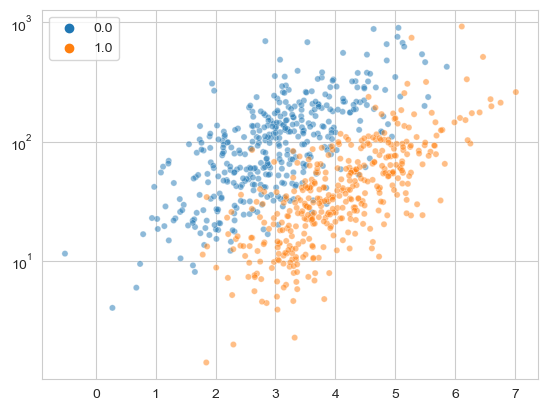

In [461]:
sns.scatterplot(
    x=x_train[:, 1],
    y=x_train[:, 2],
    hue=y_train,
    alpha=0.5,
    s=20,
)
plt.yscale('log')

In [462]:
import src.util as util

from src.linear_model import LinearModel


def main(train_path, eval_path, pred_path):
    """Problem 1(b): Logistic regression with Newton's Method.

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    # *** START CODE HERE ***
    # *** END CODE HERE ***

In [463]:
theta_arr = []

0 / 20000 Loss:  0.753585 Error:  1.476342e-02 Step:  9.990010e-07
[     0.            216.38789764 -14761.83466667]
[ 0.          0.00021639 -0.01476183]
100 / 20000 Loss:  0.632530 Error:  3.874930e-03 Step:  9.980030e-07
[   34.15154136   350.59562387 -3862.77677998]
[ 0.00724245  0.04959497 -0.00788821]
200 / 20000 Loss:  0.604766 Error:  3.982603e-04 Step:  9.970060e-07
[ 46.38849406 396.08296008 -14.5958399 ]
[ 0.01251401  0.09159395 -0.00686672]
300 / 20000 Loss:  0.586992 Error:  3.565175e-04 Step:  9.960100e-07
[ 35.97073097 355.62521391 -10.30061546]
[ 0.01660217  0.12899976 -0.00793156]
400 / 20000 Loss:  0.572662 Error:  3.207580e-04 Step:  9.950150e-07
[ 27.01537001 320.76645936  -9.5241678 ]
[ 0.01972335  0.16262443 -0.00891815]
500 / 20000 Loss:  0.560997 Error:  2.899434e-04 Step:  9.940209e-07
[ 19.28552315 290.62415487  -8.79281272]
[ 0.02201384  0.19299123 -0.00982865]
600 / 20000 Loss:  0.551414 Error:  2.632497e-04 Step:  9.930279e-07
[ 12.57266504 264.41006463  -8

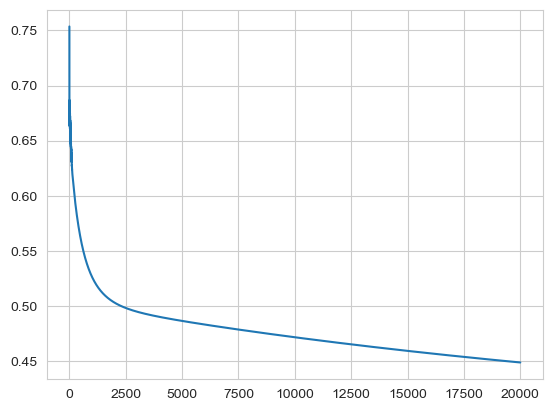

In [464]:
def logit(z):
    return 1 / (1 + np.exp(-z))


def logit_(z):
    l = logit(z)
    return l * (1 - l)

class LogisticRegression(LinearModel):
    def fit(self, x, y):
        size = x.shape[0]
        self.loss = []
        for i in range(self.max_iter):
            grad = x.T.dot(y - logit(x.dot(self.theta))) # grad of log likelihood
            old_theta = self.theta.copy()
            self.theta = self.theta + self.step_size * grad # ascent '+' because maximizing likelihood
            error = np.linalg.norm(old_theta - self.theta)
            if error < self.eps:
                break

            loss =  -1/size * (y.dot(np.log(logit(x.dot(self.theta)))) + (1 - y).dot(np.log(1 - logit(x.dot(self.theta)))))

            self.loss.append(loss)

            if self.verbose and i % 100 == 0:
                    self.step_size /= 1.001
                    print(f"{i} / {self.max_iter} Loss: {self.loss[-1]: f} Error: {error: e} Step: {self.step_size: e}")
                    print(grad)
                    print(self.theta)
                    print("="*80)

    def predict(self, x):
        return (logit(x.dot(self.theta)) > 0.5).astype(int)

model = LogisticRegression(
    max_iter=20000,
    step_size=1e-6,
    theta_0=np.zeros(x_train.shape[-1]),
)
model.fit(x_train, y_train)
theta_arr.append(model.theta.copy())
sns.lineplot(model.loss);

In [465]:
model.theta

array([-0.71600488,  0.77571522, -0.02240434])

In [466]:
def plot_decision_boundary(x, theta):
    x_line = np.linspace(x[:, -2].min() * 1.2, x[:, -2].max() * 1.2, 100)
    y_line = - (theta[0] + theta[1] * x_line) / theta[2]
    plt.plot(x_line, y_line, c='red')

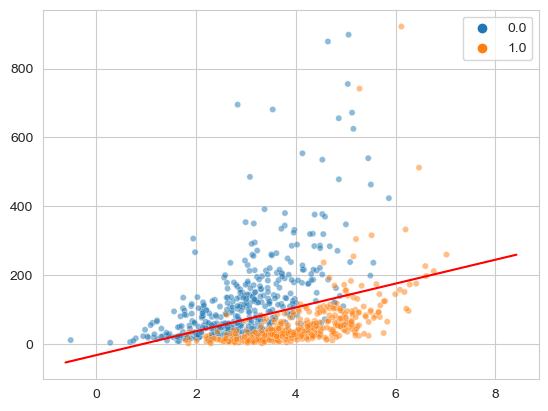

In [467]:
sns.scatterplot(
    x=x_train[:, -2],
    y=x_train[:, -1],
    hue=y_train,
    alpha=0.5,
    s=20,
)
# plt.yscale('log')
plot_decision_boundary(x_train, model.theta)
# for theta in theta_arr:
#     plot_decision_boundary(x_train, theta)

In [468]:
acc = (model.predict(x_train) == y_train).sum() / y_train.shape[0]
print('Train accuracy:', acc)
acc = (model.predict(x_valid) == y_valid).sum() / y_valid.shape[0]
print('Validation accuracy:', acc)

Train accuracy: 0.80625
Validation accuracy: 0.8


In [469]:
class LogisticRegressionNewton(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        size = x.shape[0]
        self.loss = []
        for i in range(self.max_iter):
            x_theta = x.dot(self.theta)
            hessian = np.linalg.multi_dot([x.T, np.diag(logit_(x_theta)), x])
            grad = x.T.dot(y - logit(x_theta))
            old_theta = self.theta.copy()
            self.theta = self.theta + np.linalg.inv(hessian).dot(grad)

            error = np.linalg.norm(old_theta - self.theta)
            loss =  -1/size * (y.dot(np.log(logit(x.dot(self.theta)))) + (1 - y).dot(np.log(1 - logit(x.dot(self.theta)))))

            if error < self.eps:
                break

            self.loss.append(loss)
            if self.verbose:
                print(f"{i} / {self.max_iter} Loss: {loss:.4f} Error: {error:e}")
                print(self.theta)


        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """

        # *** START CODE HERE ***
        return (logit(x.dot(self.theta)) > 0.5).astype(int)
        # *** END CODE HERE ***

In [470]:
x_train.shape

(800, 3)

0 / 10 Loss: 0.4118 Error: 3.405453e+00
[-3.2043369   1.15293034 -0.00915559]
1 / 10 Loss: 0.3439 Error: 1.697062e+00
[-4.76587158  1.81741612 -0.01856449]
2 / 10 Loss: 0.3272 Error: 1.129332e+00
[-5.79890392  2.27368058 -0.02622167]
3 / 10 Loss: 0.3256 Error: 4.482691e-01
[-6.20902699  2.45460489 -0.02948885]
4 / 10 Loss: 0.3256 Error: 5.513741e-02
[-6.25950913  2.47677497 -0.02990666]
5 / 10 Loss: 0.3256 Error: 7.382682e-04
[-6.26018478  2.47707245 -0.0299125 ]


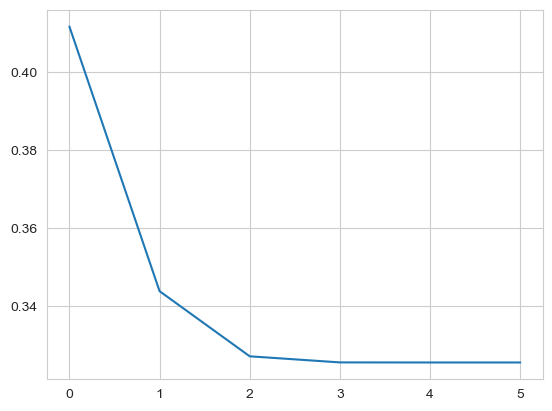

In [471]:
clf = LogisticRegressionNewton(
    theta_0=np.zeros(x_train.shape[-1]),
    max_iter=10,
)
clf.fit(x_train, y_train)

sns.lineplot(clf.loss);

Text(0.5, 1.0, 'Logistic Regression Original X')

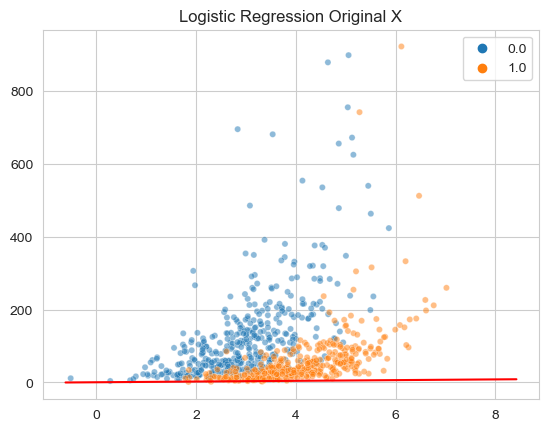

In [479]:
sns.scatterplot(
    x=x_train[:, -2],
    y=x_train[:, -1],
    hue=y_train,
    alpha=0.5,
    s=20,
)
# plt.yscale('log')
plot_decision_boundary(x_train, clf.theta)
plt.title('Logistic Regression Original X')

In [473]:
acc = (clf.predict(x_train) == y_train).sum() / y_train.shape[0]
print('Train accuracy:', acc)
acc = (clf.predict(x_valid) == y_valid).sum() / y_valid.shape[0]
print('Validation accuracy:', acc)

Train accuracy: 0.8825
Validation accuracy: 0.9


In [474]:
x_train_scaled = x_train.copy()
x_train_scaled[:, 2] = np.log(x_train[:, 2])

x_valid_scaled = x_valid.copy()
x_valid_scaled[:, 2] = np.log(x_valid[:, 2])

0 / 10 Loss: 0.3176 Error: 1.959525e+00
[ 0.66546314  1.29912477 -1.30735352]
1 / 10 Loss: 0.2422 Error: 1.355724e+00
[ 1.14735     2.18540685 -2.21304427]
2 / 10 Loss: 0.2198 Error: 1.195512e+00
[ 1.58763551  2.9595436  -3.01060891]
3 / 10 Loss: 0.2160 Error: 7.417085e-01
[ 1.87667256  3.43279309 -3.50317768]
4 / 10 Loss: 0.2158 Error: 2.006758e-01
[ 1.95833494  3.55928066 -3.63585376]
5 / 10 Loss: 0.2158 Error: 1.109773e-02
[ 1.96297847  3.56621732 -3.64316676]
6 / 10 Loss: 0.2158 Error: 3.107515e-05
[ 1.96299173  3.56623663 -3.64318719]


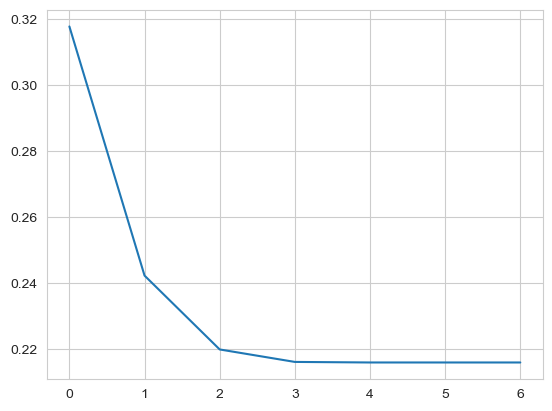

In [475]:
clf = LogisticRegressionNewton(
    theta_0=np.zeros(x_train.shape[-1]),
    max_iter=10,
)
clf.fit(x_train_scaled, y_train)

sns.lineplot(clf.loss);

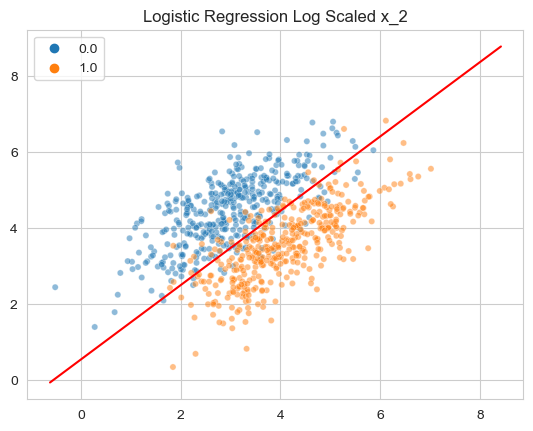

In [480]:
sns.scatterplot(
    x=x_train_scaled[:, -2],
    y=x_train_scaled[:, -1],
    hue=y_train,
    alpha=0.5,
    s=20,
)
# plt.yscale('log')
plot_decision_boundary(x_train_scaled, clf.theta)
plt.title('Logistic Regression Log Scaled x_2');

In [477]:
acc = (clf.predict(x_train_scaled) == y_train).sum() / y_train.shape[0]
print('Train accuracy:', acc)
acc = (clf.predict(x_valid_scaled) == y_valid).sum() / y_valid.shape[0]
print('Validation accuracy:', acc)

Train accuracy: 0.91
Validation accuracy: 0.95
